In [1]:
# we import the data from the other notebook
%run data.ipynb

In [195]:
X = df.drop(['casual', 'registered', 'cnt'], axis=1)
Y = df['cnt']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=10,
)

In [196]:

#Support Vector Machine Based Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from collections import defaultdict

scores = defaultdict(dict)

classifiers = {
    'logistic-regression' : LogisticRegression,
    'k-nearest-neighbors' : KNeighborsClassifier,
    'decision-tree' : DecisionTreeClassifier,
    'gaussian-nb' : GaussianNB
    
}

In [197]:
clf = RandomForestRegressor()

In [198]:
clf.fit(X_train, Y_train)

/home/andreas/projects/geordi/algoneer/algoneer/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [199]:
from sklearn.metrics import explained_variance_score, r2_score, accuracy_score

Y_pred_test = clf.predict(X_test)

print(explained_variance_score(Y_pred_test, Y_test))

0.850728274305272


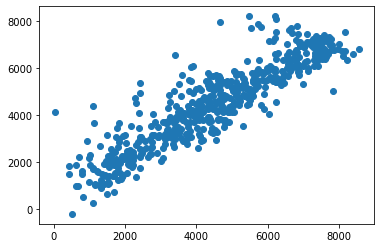

In [204]:
import matplotlib.pylab as pl
%matplotlib inline
pl.plot(Y_train, Y_pred_train, ls='', marker='o')

## Partial Dependence Plot

To make a partial dependence plot for a given feature, we implement the following algorithm:

* If the feature is categorical, we generate a list of all possible feature values.
* If the features is numerical, we generate a list of values spanning the valid range of the feature
* For each value from the list of values, we calculate the average prediction value (for regression) or the class frequencies (for classification) over all datapoints in the dataset.
* We plot the resulting value as a function of the feature value.

In [200]:
import numpy as np

def pdp_numerical(X, model, column):
    """
    Generate the partial dependence
    """
    values = X[column]
    uniques = sorted(values.unique())
    YS = []
    for v in uniques:
        NX = X.copy()
        NX[column] = v
        Y = clf.predict(NX)
        YS.append(np.mean(Y))
    return uniques, YS

def pdp_categorical(X, model, column):
    """
    Generate the partial dependence
    """
    values = X[column]
    uniques = sorted(values.unique())
    YS = []
    for v in uniques:
        NX = X.copy()
        NX[column] = v
        Y = clf.predict(NX)
        YS.append(np.mean(Y))
    return uniques, YS


In [201]:
xs, pdv = pdp_numerical(X_train, clf, "atemp")

In [202]:
import matplotlib.pylab as pl

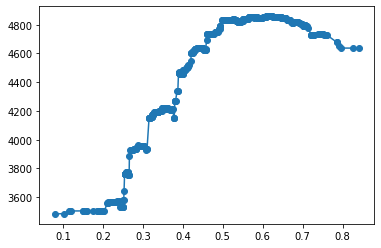

In [203]:
pl.plot(xs, pdv, marker='o')